# 1. Data Loading

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
import plotly.express as px
import plotly.graph_objects as go
import joblib
from flask import Flask, request, jsonify

# Set up Kaggle API credentials (ensure you have kaggle.json in ~/.kaggle or configure it here)
os.environ['KAGGLE_CONFIG_DIR'] = "~/.kaggle"

# Download the dataset from Kaggle
!kaggle datasets download -d moneystore/agencyperformance
!unzip agencyperformance.zip

# Load the dataset
data = pd.read_csv('finalapi.csv')

Dataset URL: https://www.kaggle.com/datasets/moneystore/agencyperformance
License(s): DbCL-1.0
  0% 0.00/5.08M [00:00<?, ?B/s]
100% 5.08M/5.08M [00:00<00:00, 140MB/s]
Archive:  agencyperformance.zip
  inflating: finalapi.csv            


# 2. Data Cleaning and Preprocessing





In [2]:
print("The numer of rows are: ",data.shape[0], "\nThe number of columns are: ",data.shape[1])

print("\n",data.columns)

The numer of rows are:  213328 
The number of columns are:  49

 Index(['AGENCY_ID', 'PRIMARY_AGENCY_ID', 'PROD_ABBR', 'PROD_LINE',
       'STATE_ABBR', 'STAT_PROFILE_DATE_YEAR', 'RETENTION_POLY_QTY',
       'POLY_INFORCE_QTY', 'PREV_POLY_INFORCE_QTY', 'NB_WRTN_PREM_AMT',
       'WRTN_PREM_AMT', 'PREV_WRTN_PREM_AMT', 'PRD_ERND_PREM_AMT',
       'PRD_INCRD_LOSSES_AMT', 'MONTHS', 'RETENTION_RATIO', 'LOSS_RATIO',
       'LOSS_RATIO_3YR', 'GROWTH_RATE_3YR', 'AGENCY_APPOINTMENT_YEAR',
       'ACTIVE_PRODUCERS', 'MAX_AGE', 'MIN_AGE', 'VENDOR_IND', 'VENDOR',
       'PL_START_YEAR', 'PL_END_YEAR', 'COMMISIONS_START_YEAR',
       'COMMISIONS_END_YEAR', 'CL_START_YEAR', 'CL_END_YEAR',
       'ACTIVITY_NOTES_START_YEAR', 'ACTIVITY_NOTES_END_YEAR',
       'CL_BOUND_CT_MDS', 'CL_QUO_CT_MDS', 'CL_BOUND_CT_SBZ', 'CL_QUO_CT_SBZ',
       'CL_BOUND_CT_eQT', 'CL_QUO_CT_eQT', 'PL_BOUND_CT_ELINKS',
       'PL_QUO_CT_ELINKS', 'PL_BOUND_CT_PLRANK', 'PL_QUO_CT_PLRANK',
       'PL_BOUND_CT_eQTte', 'PL_QUO_CT_e

In [3]:
data.columns

Index(['AGENCY_ID', 'PRIMARY_AGENCY_ID', 'PROD_ABBR', 'PROD_LINE',
       'STATE_ABBR', 'STAT_PROFILE_DATE_YEAR', 'RETENTION_POLY_QTY',
       'POLY_INFORCE_QTY', 'PREV_POLY_INFORCE_QTY', 'NB_WRTN_PREM_AMT',
       'WRTN_PREM_AMT', 'PREV_WRTN_PREM_AMT', 'PRD_ERND_PREM_AMT',
       'PRD_INCRD_LOSSES_AMT', 'MONTHS', 'RETENTION_RATIO', 'LOSS_RATIO',
       'LOSS_RATIO_3YR', 'GROWTH_RATE_3YR', 'AGENCY_APPOINTMENT_YEAR',
       'ACTIVE_PRODUCERS', 'MAX_AGE', 'MIN_AGE', 'VENDOR_IND', 'VENDOR',
       'PL_START_YEAR', 'PL_END_YEAR', 'COMMISIONS_START_YEAR',
       'COMMISIONS_END_YEAR', 'CL_START_YEAR', 'CL_END_YEAR',
       'ACTIVITY_NOTES_START_YEAR', 'ACTIVITY_NOTES_END_YEAR',
       'CL_BOUND_CT_MDS', 'CL_QUO_CT_MDS', 'CL_BOUND_CT_SBZ', 'CL_QUO_CT_SBZ',
       'CL_BOUND_CT_eQT', 'CL_QUO_CT_eQT', 'PL_BOUND_CT_ELINKS',
       'PL_QUO_CT_ELINKS', 'PL_BOUND_CT_PLRANK', 'PL_QUO_CT_PLRANK',
       'PL_BOUND_CT_eQTte', 'PL_QUO_CT_eQTte', 'PL_BOUND_CT_APPLIED',
       'PL_QUO_CT_APPLIED', 'PL_BOU

**Assigning numeric labels to Categories**



Few of the important variables that are requried for the anlaysis further are mapped with numerical values based on their categories. This is done for further feasibility of analysis and building of the models.

In [4]:
categorical_columns = ['PROD_ABBR', 'PROD_LINE', 'STATE_ABBR', 'VENDOR']

# Map each categorical column to numeric values
for col in categorical_columns:
    unique_values = data[col].unique()
    mapping = {value: idx for idx, value in enumerate(unique_values)}
    data[col] = data[col].map(mapping)
    print(f"\nThe Unique values in the {col} Variable are: \n{data[col].unique()}")


print("\nUpdated Data Types:\n", data.dtypes)


The Unique values in the PROD_ABBR Variable are: 
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27]

The Unique values in the PROD_LINE Variable are: 
[0 1]

The Unique values in the STATE_ABBR Variable are: 
[0 1 2 3 4 5]

The Unique values in the VENDOR Variable are: 
[0 1 2 3 4 5 6 7 8 9]

Updated Data Types:
 AGENCY_ID                      int64
PRIMARY_AGENCY_ID              int64
PROD_ABBR                      int64
PROD_LINE                      int64
STATE_ABBR                     int64
STAT_PROFILE_DATE_YEAR         int64
RETENTION_POLY_QTY             int64
POLY_INFORCE_QTY               int64
PREV_POLY_INFORCE_QTY          int64
NB_WRTN_PREM_AMT             float64
WRTN_PREM_AMT                float64
PREV_WRTN_PREM_AMT           float64
PRD_ERND_PREM_AMT            float64
PRD_INCRD_LOSSES_AMT         float64
MONTHS                         int64
RETENTION_RATIO              float64
LOSS_RATIO                   float64
LOSS_RATIO_3YR    

**Checking for Class Imbalance**

The counts of observations in each class are: 
STATE_ABBR
3    101323
0     34923
4     32207
1     29420
5     11764
2      3691
Name: count, dtype: int64

The percentage of classes are:
STATE_ABBR
3    47.496344
0    16.370566
4    15.097409
1    13.790970
5     5.514513
2     1.730200
Name: count, dtype: float64


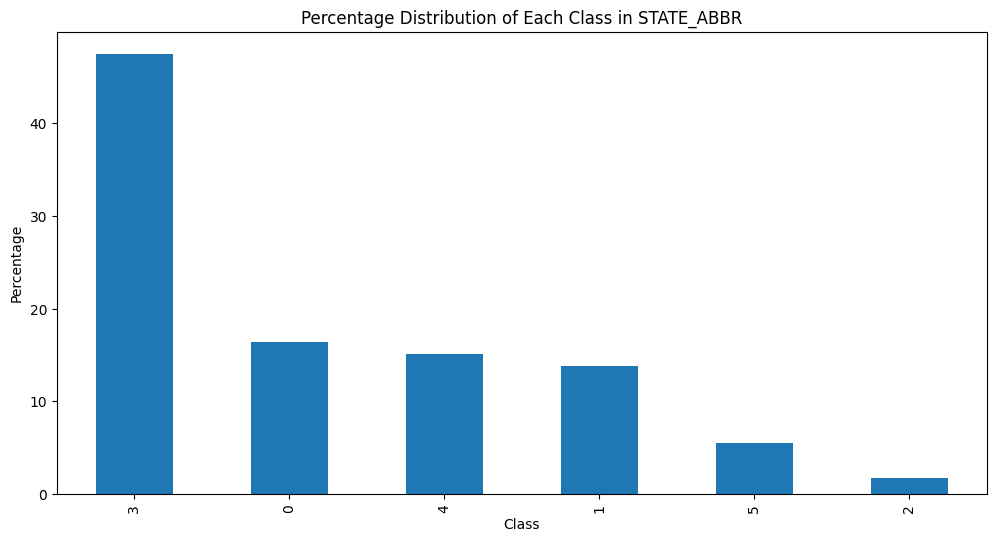

In [5]:
target_column = 'STATE_ABBR'


print("The counts of observations in each class are: ")
print(data[target_column].value_counts())

print("\nThe percentage of classes are:")
class_percentages = (data[target_column].value_counts() / float(len(data))) * 100
print(class_percentages)


plt.figure(figsize=(12, 6))
class_percentages.plot.bar()
plt.title('Percentage Distribution of Each Class in {}'.format(target_column))
plt.xlabel('Class')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.show()


**Check for null values**

In [6]:
print(data.head())

   AGENCY_ID  PRIMARY_AGENCY_ID  PROD_ABBR  PROD_LINE  STATE_ABBR  \
0          3                  3          0          0           0   
1          3                  3          0          0           0   
2          3                  3          0          0           0   
3          3                  3          0          0           0   
4          3                  3          0          0           0   

   STAT_PROFILE_DATE_YEAR  RETENTION_POLY_QTY  POLY_INFORCE_QTY  \
0                    2005                   0                 0   
1                    2006                   0                 0   
2                    2007                   0                 0   
3                    2008                   0                 0   
4                    2009                   0                 0   

   PREV_POLY_INFORCE_QTY  NB_WRTN_PREM_AMT  ...  PL_BOUND_CT_ELINKS  \
0                      0              40.0  ...                   0   
1                      0             151

**Removing null values**

In [7]:
data.dropna(inplace=True)

**Check for duplicates**

In [8]:
print(data.duplicated().sum())

0


**Distribution of Numerical Variables**

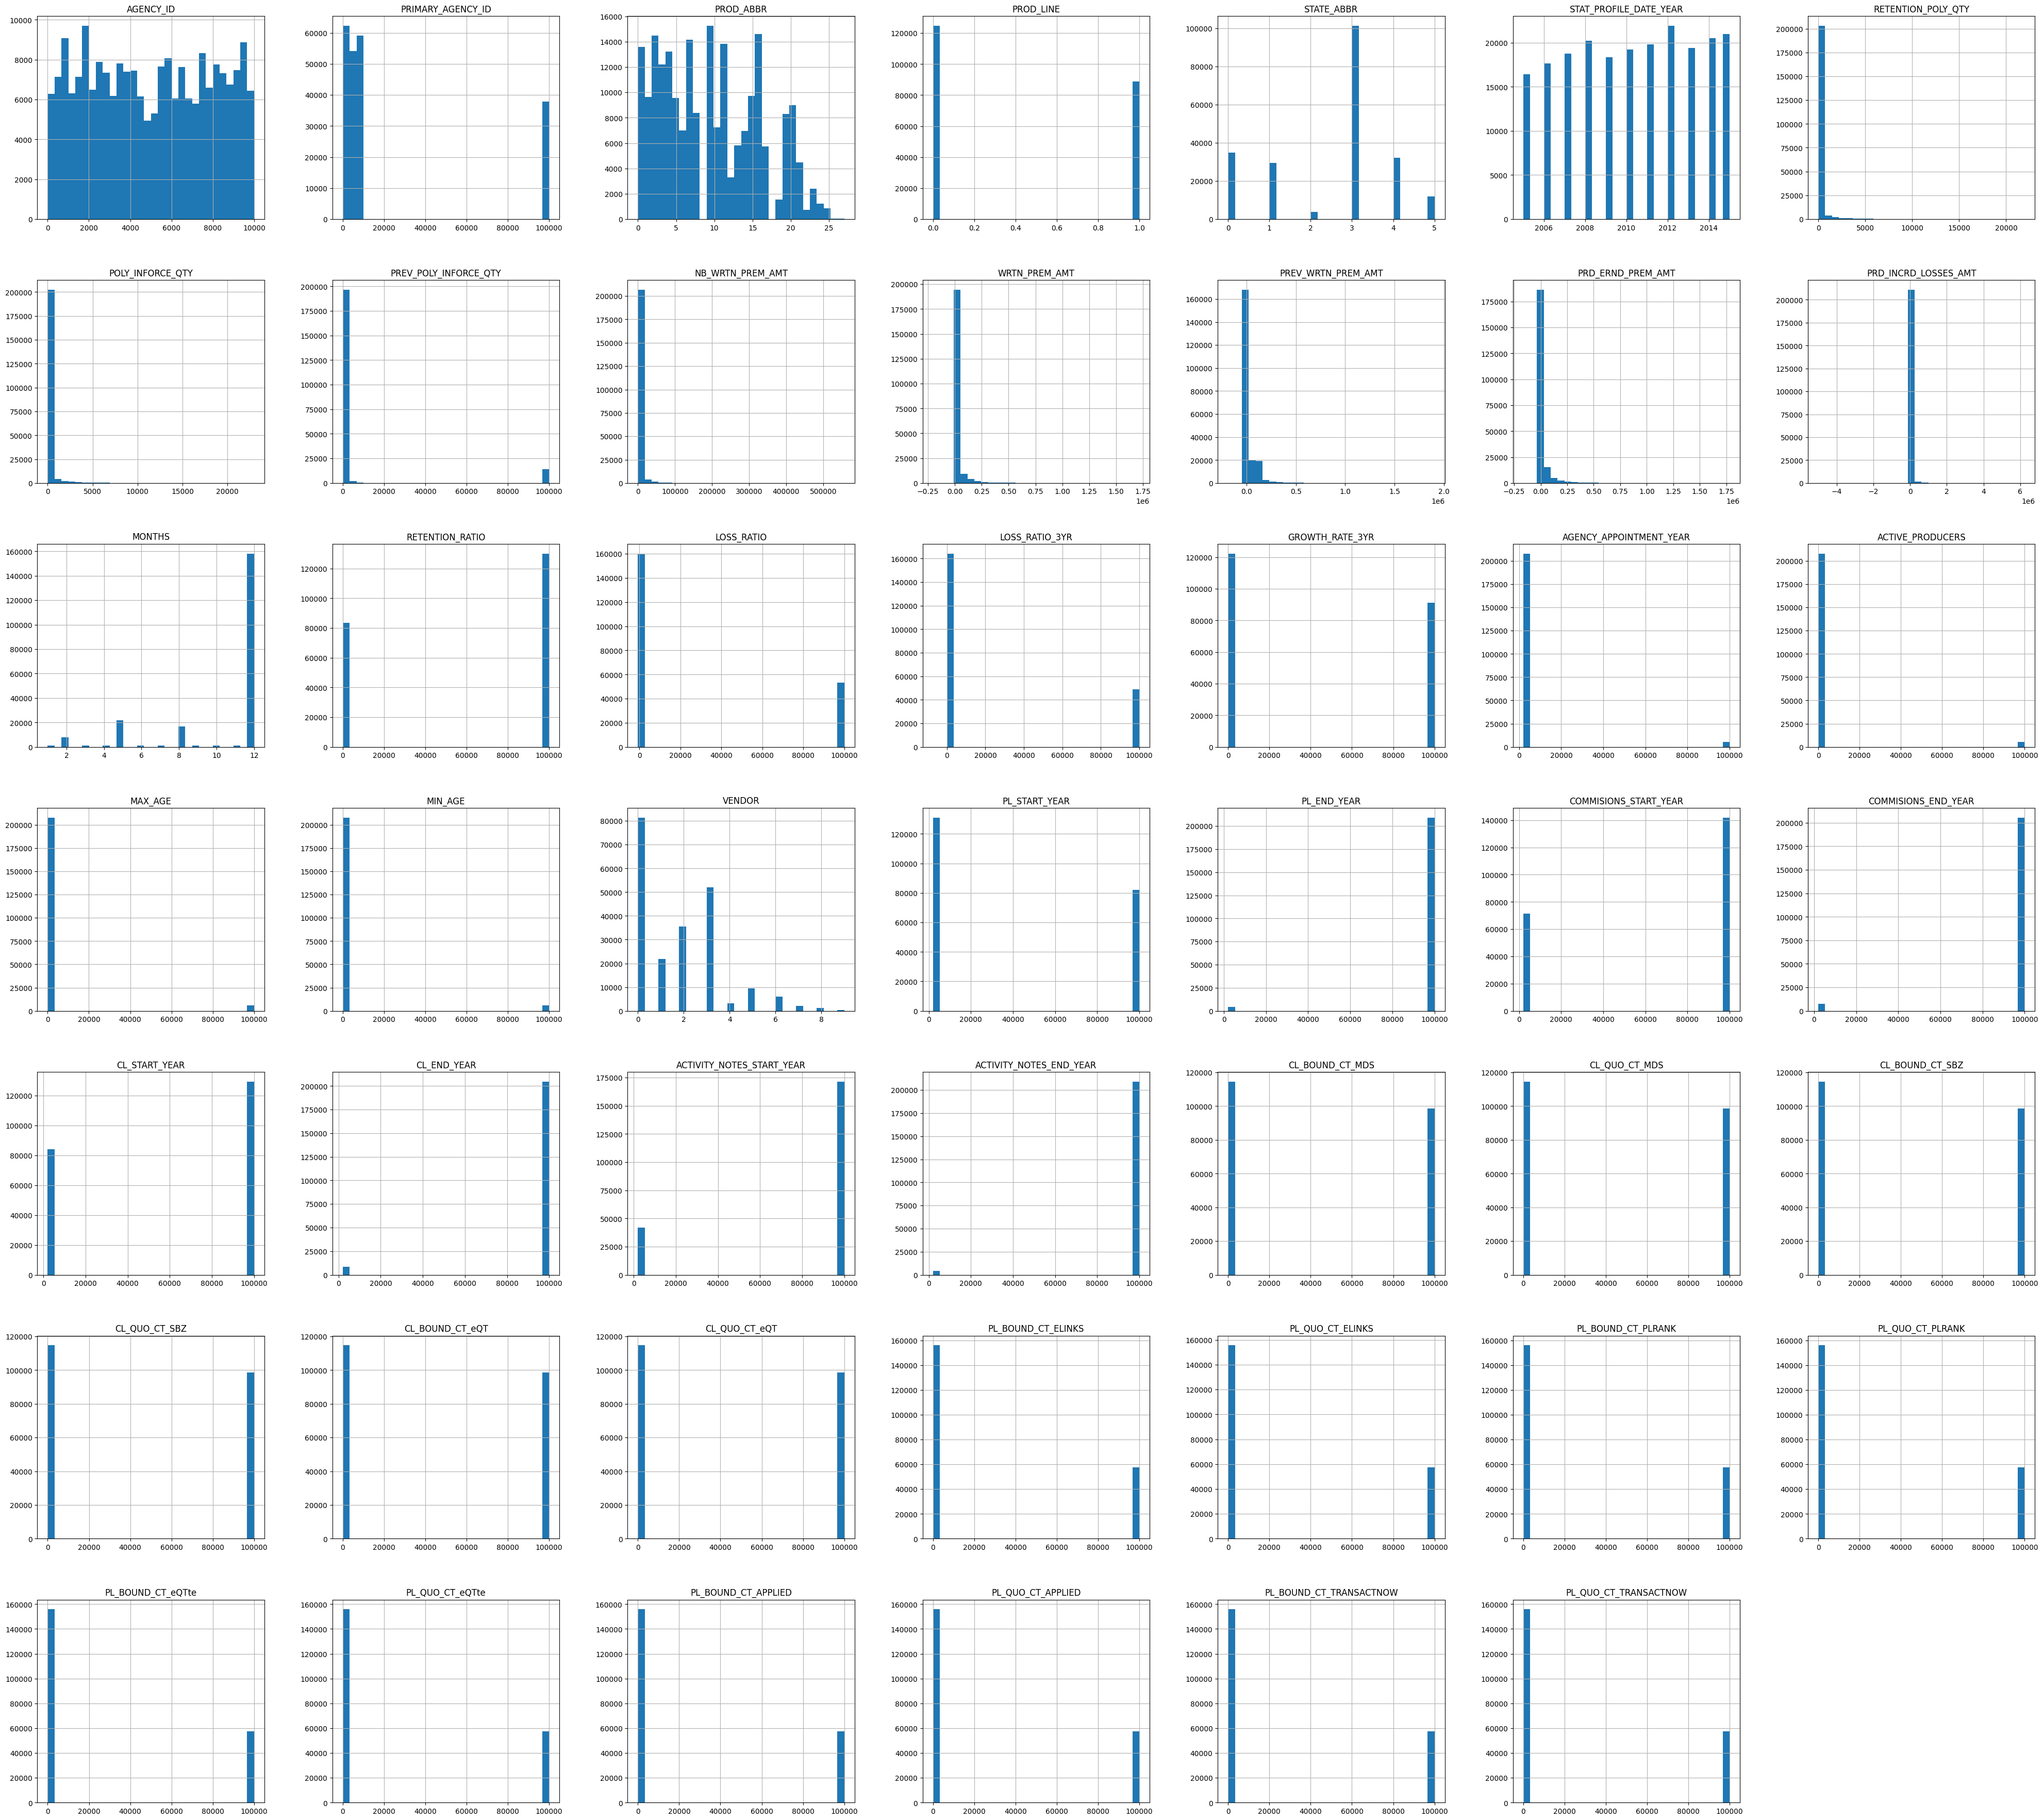

In [9]:
data.hist(bins=30, figsize=(50, 45))
plt.show()

**Encode categorical variables using Label Encoding**

In [10]:
label_encoders = {}
categorical_columns = data.select_dtypes(include=['object']).columns

for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

**Summary Of Data**

In [11]:
print(data.describe())

           AGENCY_ID  PRIMARY_AGENCY_ID      PROD_ABBR      PROD_LINE  \
count  213328.000000      213328.000000  213328.000000  213328.000000   
mean     4978.964158       21840.982206       9.470918       0.415492   
std      2928.027642       36410.355440       6.508844       0.492808   
min         3.000000           3.000000       0.000000       0.000000   
25%      2366.000000        2788.000000       4.000000       0.000000   
50%      4976.000000        6110.000000       9.000000       0.000000   
75%      7589.000000        9285.000000      15.000000       1.000000   
max      9998.000000       99999.000000      27.000000       1.000000   

          STATE_ABBR  STAT_PROFILE_DATE_YEAR  RETENTION_POLY_QTY  \
count  213328.000000           213328.000000       213328.000000   
mean        2.477026             2010.191738          158.634525   
std         1.462995                3.129108          718.766295   
min         0.000000             2005.000000            0.000000   
25

# 3. Exploratory Data Analysis (EDA)

**Distribution of Numerical Variables**

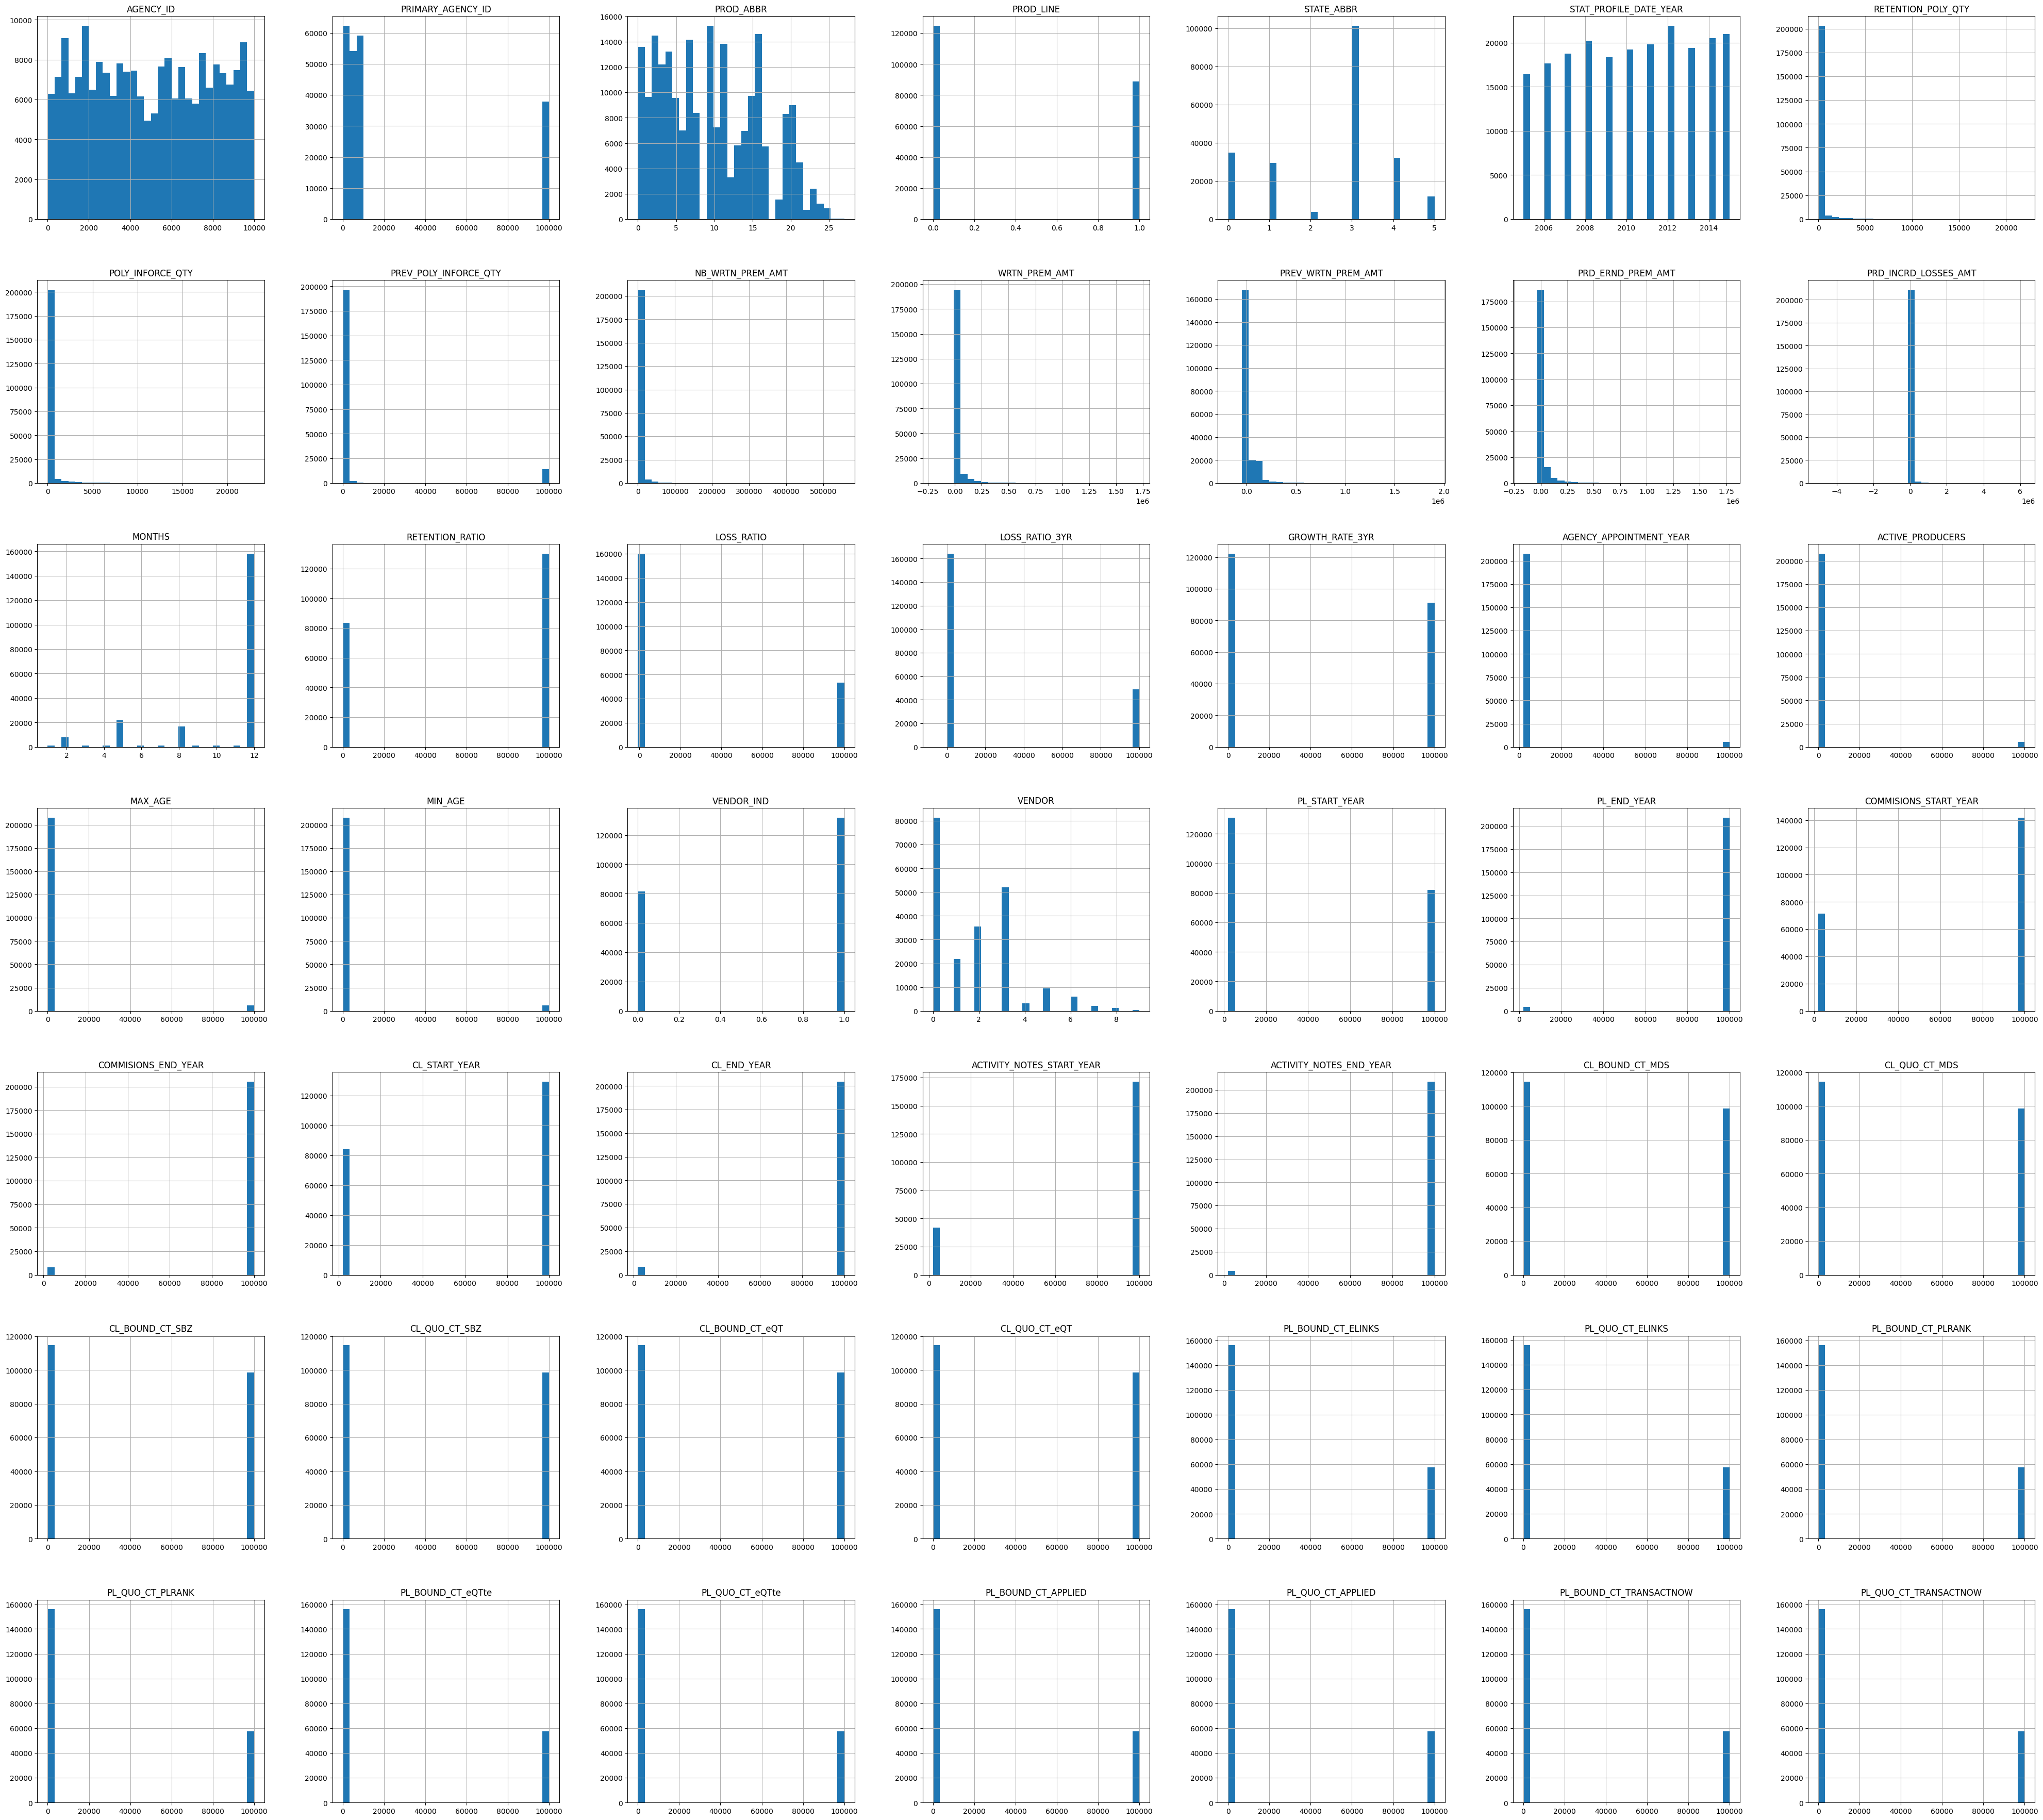

In [12]:
data.hist(bins=30, figsize=(50, 45))
plt.show()

**Box Plots for the Numerical Variables to Check for Outliers**

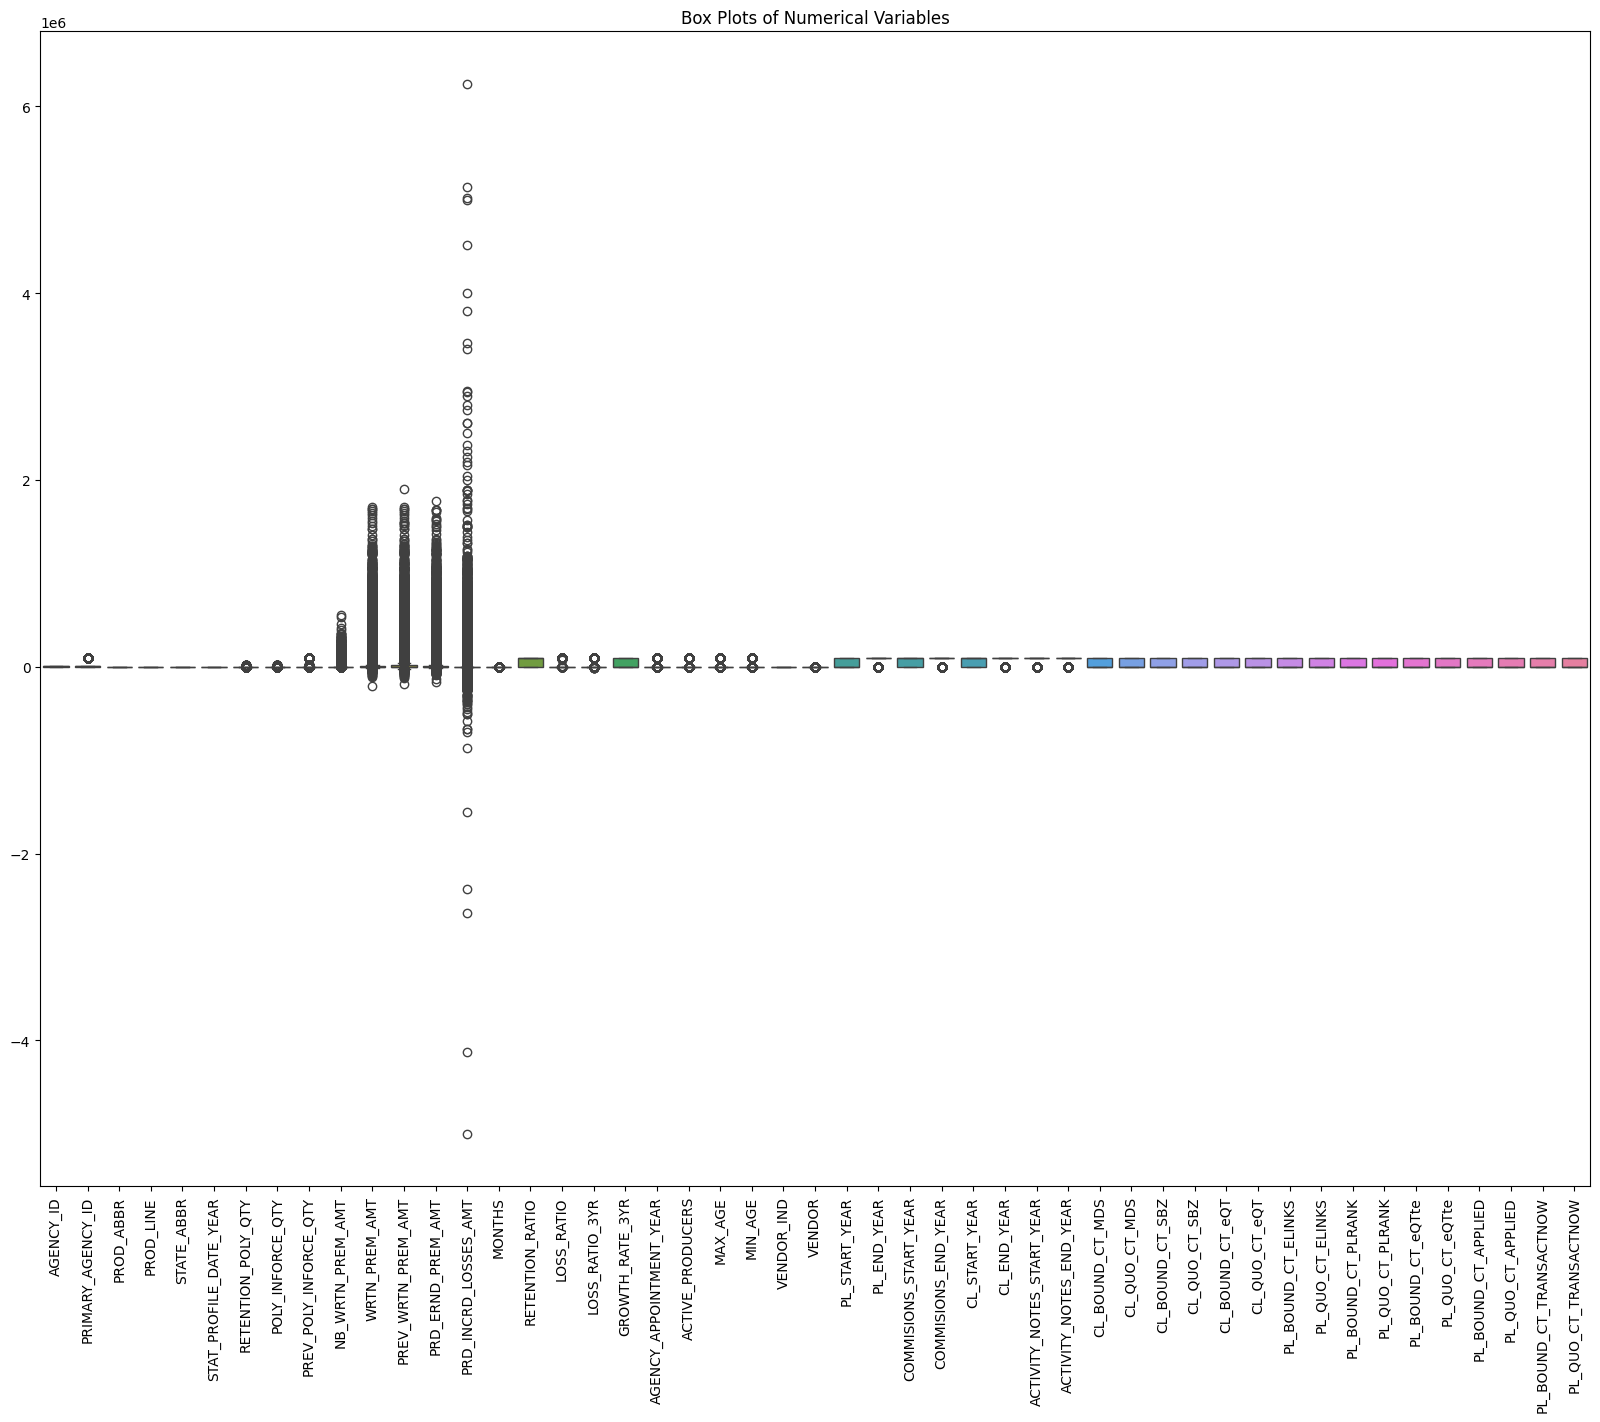

In [13]:
plt.figure(figsize=(20, 15))
sns.boxplot(data=data)
plt.title('Box Plots of Numerical Variables')
plt.xticks(rotation=90)
plt.show()


**Correlation Analysis**

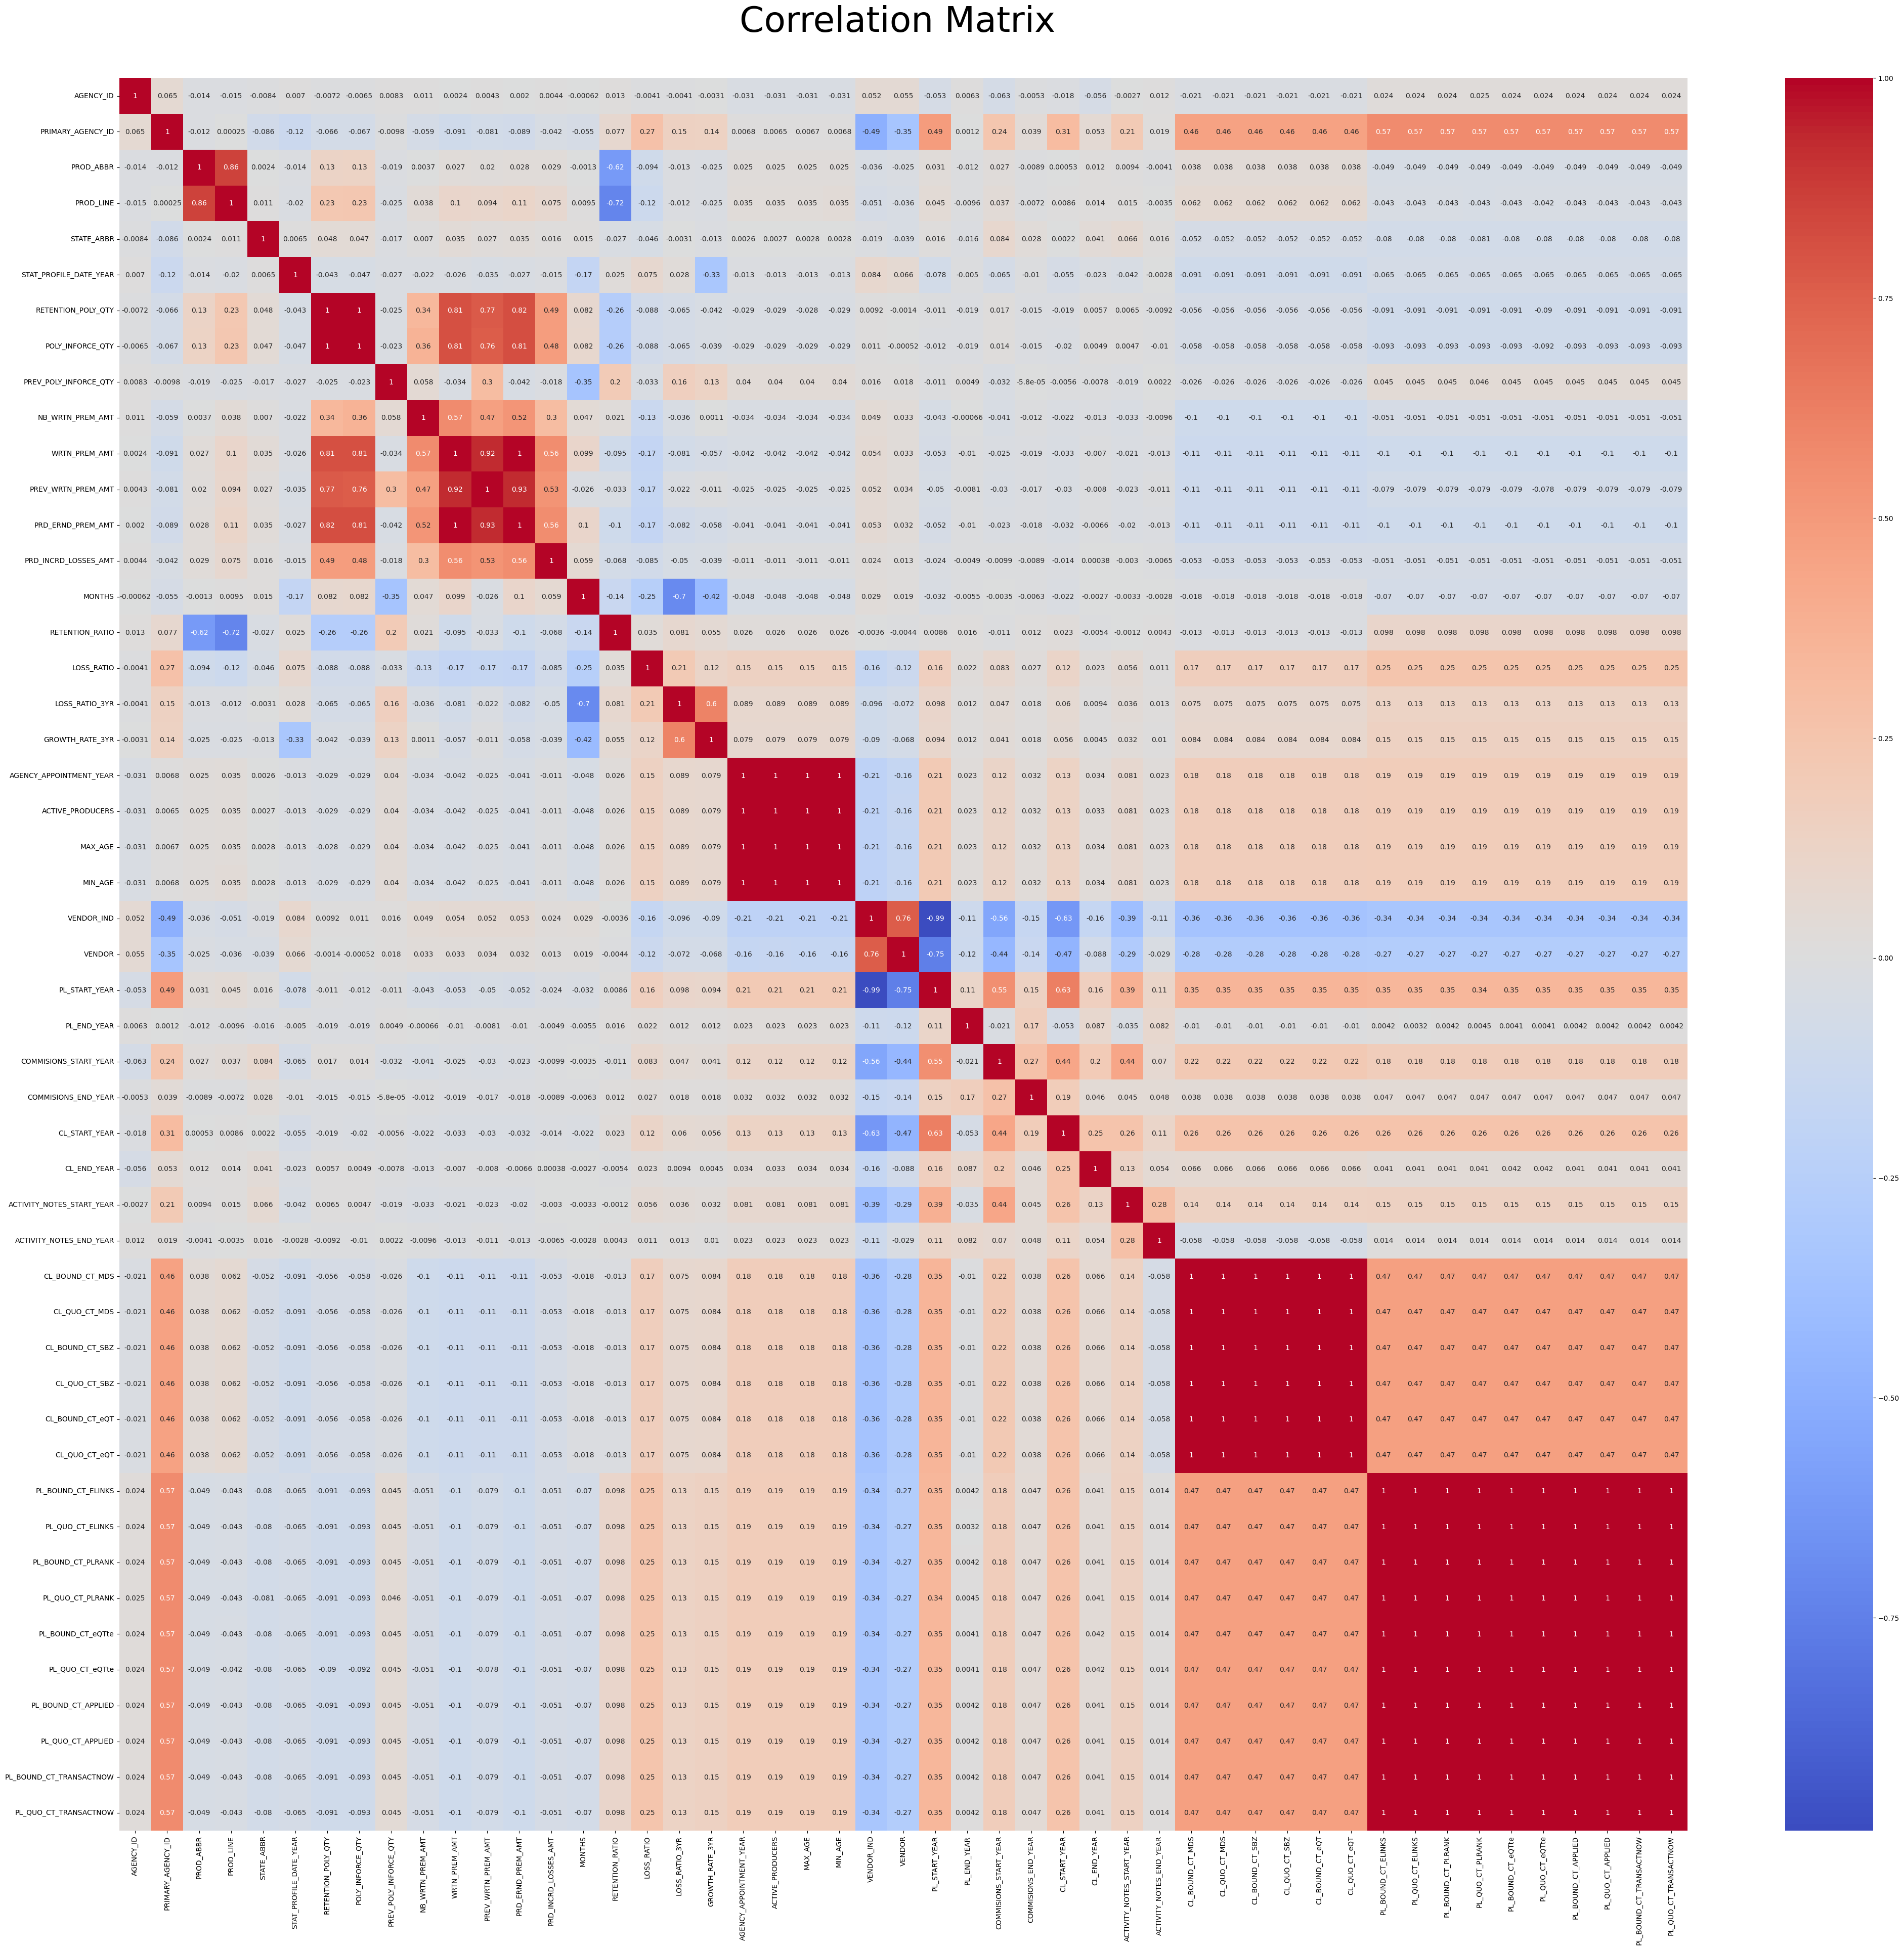

In [14]:
plt.figure(figsize=(50, 45))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix \n', fontsize=50)
plt.show()

**Summary statistics**

In [15]:

summary = data.describe()
print(summary)


           AGENCY_ID  PRIMARY_AGENCY_ID      PROD_ABBR      PROD_LINE  \
count  213328.000000      213328.000000  213328.000000  213328.000000   
mean     4978.964158       21840.982206       9.470918       0.415492   
std      2928.027642       36410.355440       6.508844       0.492808   
min         3.000000           3.000000       0.000000       0.000000   
25%      2366.000000        2788.000000       4.000000       0.000000   
50%      4976.000000        6110.000000       9.000000       0.000000   
75%      7589.000000        9285.000000      15.000000       1.000000   
max      9998.000000       99999.000000      27.000000       1.000000   

          STATE_ABBR  STAT_PROFILE_DATE_YEAR  RETENTION_POLY_QTY  \
count  213328.000000           213328.000000       213328.000000   
mean        2.477026             2010.191738          158.634525   
std         1.462995                3.129108          718.766295   
min         0.000000             2005.000000            0.000000   
25

# 4. Feature Engineering

**Scaling the Data**

In [16]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.drop('NB_WRTN_PREM_AMT', axis=1))
X = pd.DataFrame(scaled_data, columns=data.columns.drop('NB_WRTN_PREM_AMT'))
y = data['NB_WRTN_PREM_AMT']


In [17]:
y.unique()

array([  40.,  151.,   69., ..., 3561., 5131., 4298.])

**Splitting the Data into Train and Testing Sets**

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
X.head()

AGENCY_ID  PRIMARY_AGENCY_ID  PROD_ABBR  PROD_LINE  STATE_ABBR  \
0  -1.699429          -0.599775  -1.455088  -0.843113   -1.693124   
1  -1.699429          -0.599775  -1.455088  -0.843113   -1.693124   
2  -1.699429          -0.599775  -1.455088  -0.843113   -1.693124   
3  -1.699429          -0.599775  -1.455088  -0.843113   -1.693124   
4  -1.699429          -0.599775  -1.455088  -0.843113   -1.693124   

   STAT_PROFILE_DATE_YEAR  RETENTION_POLY_QTY  POLY_INFORCE_QTY  \
0               -1.659179           -0.220704         -0.226708   
1               -1.339598           -0.220704         -0.226708   
2               -1.020018           -0.220704         -0.226708   
3               -0.700437           -0.220704         -0.226708   
4               -0.380856           -0.220704         -0.226708   

   PREV_POLY_INFORCE_QTY  WRTN_PREM_AMT  ...  PL_BOUND_CT_ELINKS  \
0              -0.271684      -0.249204  ...           -0.607073   
1              -0.271684      -0.196714  ...           -0.607073   
2              -0.271684      -0.202089  ...           -0.607073   
3              -0.271684      -0.217820  ...           -0.607073   
4              -0.271684      -0.227335  ...           -0.607073   

   PL_QUO_CT_ELINKS  PL_BOUND_CT_PLRANK  PL_QUO_CT_PLRANK  PL_BOUND_CT_eQTte  \
0         -0.608337           -0.607185         -0.608174          -0.607035   
1         -0.608337           -0.607185         -0.608174          -0.607035   
2         -0.608337           -0.607185         -0.608174          -0.607035   
3         -0.608337           -0.607185         -0.608174          -0.607035   
4         -0.608337           -0.607185         -0.608174          -0.607035   

   PL_QUO_CT_eQTte  PL_BOUND_CT_APPLIED  PL_QUO_CT_APPLIED  \
0        -0.605605            -0.607071          -0.607241   
1        -0.605605            -0.607071          -0.607241   
2        -0.605605            -0.607071          -0.607241   
3        -0.605605            -0.607071          -0.607241   
4        -0.605605            -0.607071          -0.607241   

   PL_BOUND_CT_TRANSACTNOW  PL_QUO_CT_TRANSACTNOW  
0                -0.607047              -0.607051  
1                -0.607047              -0.607051  
2                -0.607047              -0.607051  
3                -0.607047              -0.607051  
4                -0.607047              -0.607051  

[5 rows x 48 columns]

**Training and Testing Set for X**

In [20]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(data.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(data.index)) * 100))

80.00% data is in training set
20.00% data is in test set


**Training and Testing Set for y**

In [21]:
print("{0:0.2f}% data is in training set".format((len(y_train)/len(data.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(y_test)/len(data.index)) * 100))

80.00% data is in training set
20.00% data is in test set


# 5. Model Building and Evaluation

**Building the Multiple Linear Regression Model**

In [22]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

**Making Predictions**

In [23]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

**Evaluating the Model**

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

In [25]:
train_metrics = evaluate_model(y_train, y_train_pred)
test_metrics = evaluate_model(y_test, y_test_pred)

In [26]:
print("Train Metrics: MAE: {:.4f}, MSE: {:.4f}, RMSE: {:.4f}, R2: {:.4f}".format(*train_metrics))
print("Test Metrics: MAE: {:.4f}, MSE: {:.4f}, RMSE: {:.4f}, R2: {:.4f}".format(*test_metrics))

Train Metrics: MAE: 1945.4368, MSE: 38317118.4571, RMSE: 6190.0823, R2: 0.6186
Test Metrics: MAE: 1953.1632, MSE: 41412537.2934, RMSE: 6435.2574, R2: 0.5680


**Plotting the Model**

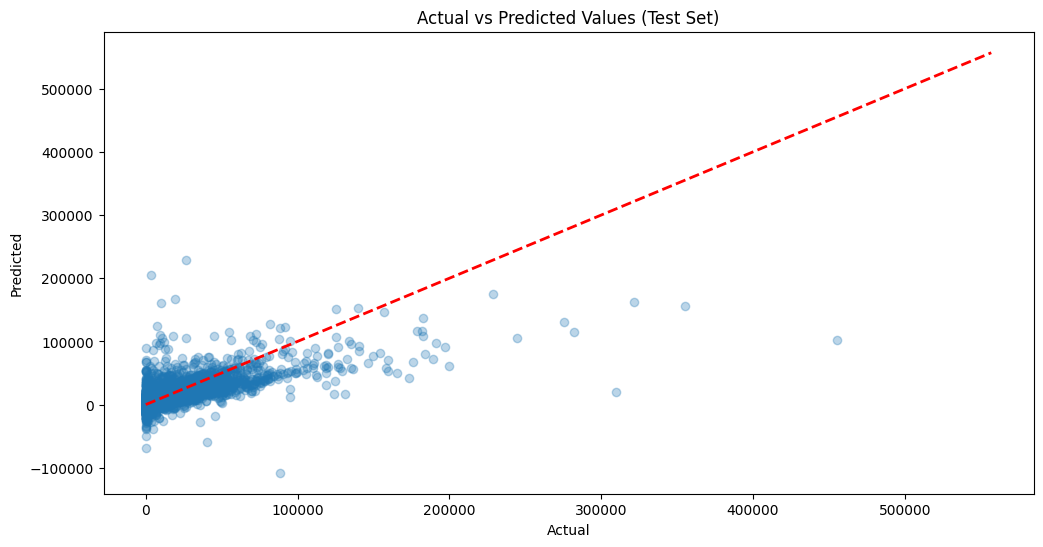

In [27]:

plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values (Test Set)')
plt.show()

# 6. Cross Validation

In [36]:
from sklearn.model_selection import cross_val_score

# Cross-Validation
model = LinearRegression()
cv_scores = cross_val_score(model, X, y, cv=10, scoring='r2')
print(f'Cross-Validation R2 Scores: {cv_scores}')
print(f'Mean Cross-Validation R2 Score: {cv_scores.mean()}')


Cross-Validation R2 Scores: [0.59036583 0.64863765 0.60600779 0.61931094 0.55601499 0.55986759
 0.62484532 0.61195018 0.54833147 0.67251033]
Mean Cross-Validation R2 Score: 0.6037842088000064


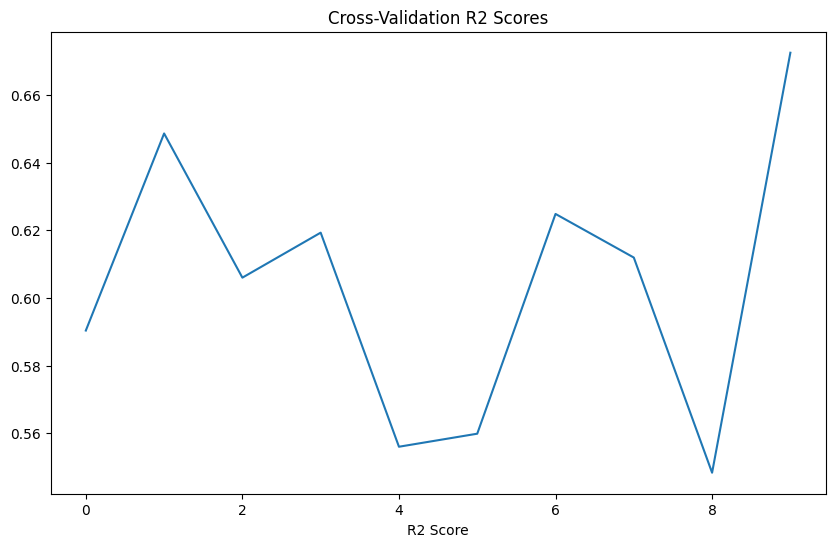

In [37]:
plt.figure(figsize=(10, 6))
sns.lineplot(cv_scores)
plt.title('Cross-Validation R2 Scores')
plt.xlabel('R2 Score')
plt.show()


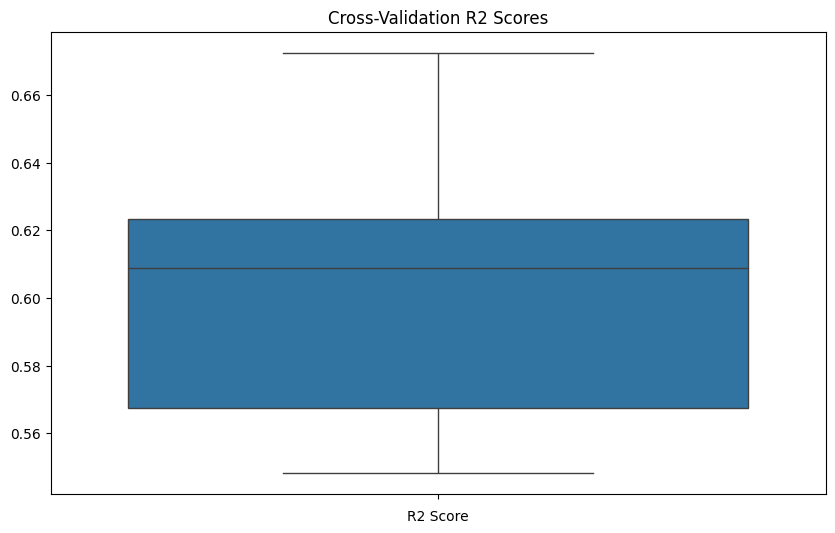

In [38]:
plt.figure(figsize=(10, 6))
sns.boxplot(cv_scores)
plt.title('Cross-Validation R2 Scores')
plt.xlabel('R2 Score')
plt.show()


**Alternatively, using a bar plot**

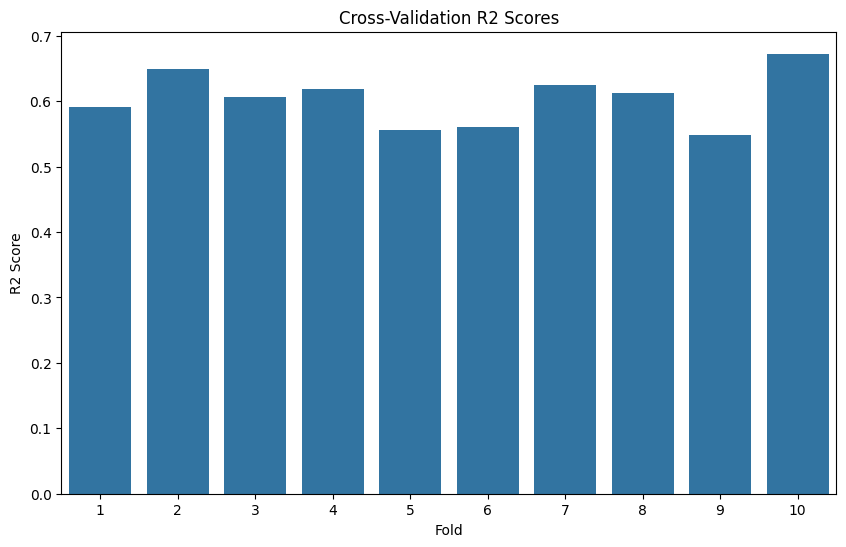

In [39]:

plt.figure(figsize=(10, 6))
sns.barplot(x=list(range(1, 11)), y=cv_scores)
plt.title('Cross-Validation R2 Scores')
plt.xlabel('Fold')
plt.ylabel('R2 Score')
plt.show()

# 7. Advanced Feature Engineering and Ensemble Methods

**Ridge Regression**

In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV


ridge = Ridge()
ridge_params = {'alpha': [0.1, 1.0, 10.0]}
ridge_grid = GridSearchCV(ridge, ridge_params, cv=5, scoring='r2')
ridge_grid.fit(X_train, y_train)
print(f'Best Ridge Parameters: {ridge_grid.best_params_}')

Best Ridge Parameters: {'alpha': 0.1}


**Lasso Regression**

In [ ]:
lasso = Lasso()
lasso_params = {'alpha': [0.1, 1.0, 10.0]}
lasso_grid = GridSearchCV(lasso, lasso_params, cv=5, scoring='r2')
lasso_grid.fit(X_train, y_train)
print(f'Best Lasso Parameters: {lasso_grid.best_params_}')

**ElasticNet Regression**

In [ ]:
elasticnet = ElasticNet()
elasticnet_params = {'alpha': [0.1, 1.0, 10.0], 'l1_ratio': [0.2, 0.5, 0.8]}
elasticnet_grid = GridSearchCV(elasticnet, elasticnet_params, cv=5, scoring='r2')
elasticnet_grid.fit(X_train, y_train)
print(f'Best ElasticNet Parameters: {elasticnet_grid.best_params_}')

# 8. Visualizations

**Retention Policies VS Written Premium**

In [40]:
fig = px.scatter(data, x='RETENTION_POLY_QTY', y='NB_WRTN_PREM_AMT', color='STATE_ABBR', title='Retention Policies vs Written Premiums (Scatter Plot)')
fig.show()

**State-wise Distribution of Written Premiums**

In [41]:
fig = px.box(data, x='STATE_ABBR', y='NB_WRTN_PREM_AMT', title='State-wise Distribution of Written Premiums')
fig.show()

**HeatMap of Missing Values**

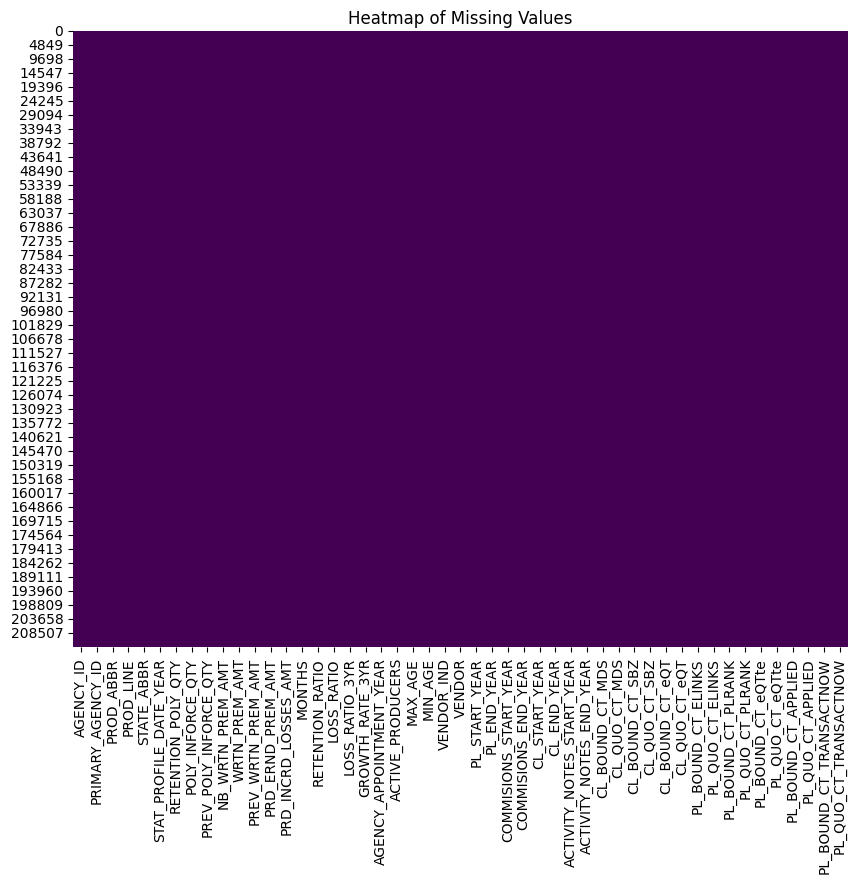

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

**Distribution of Retention Ratio by State**

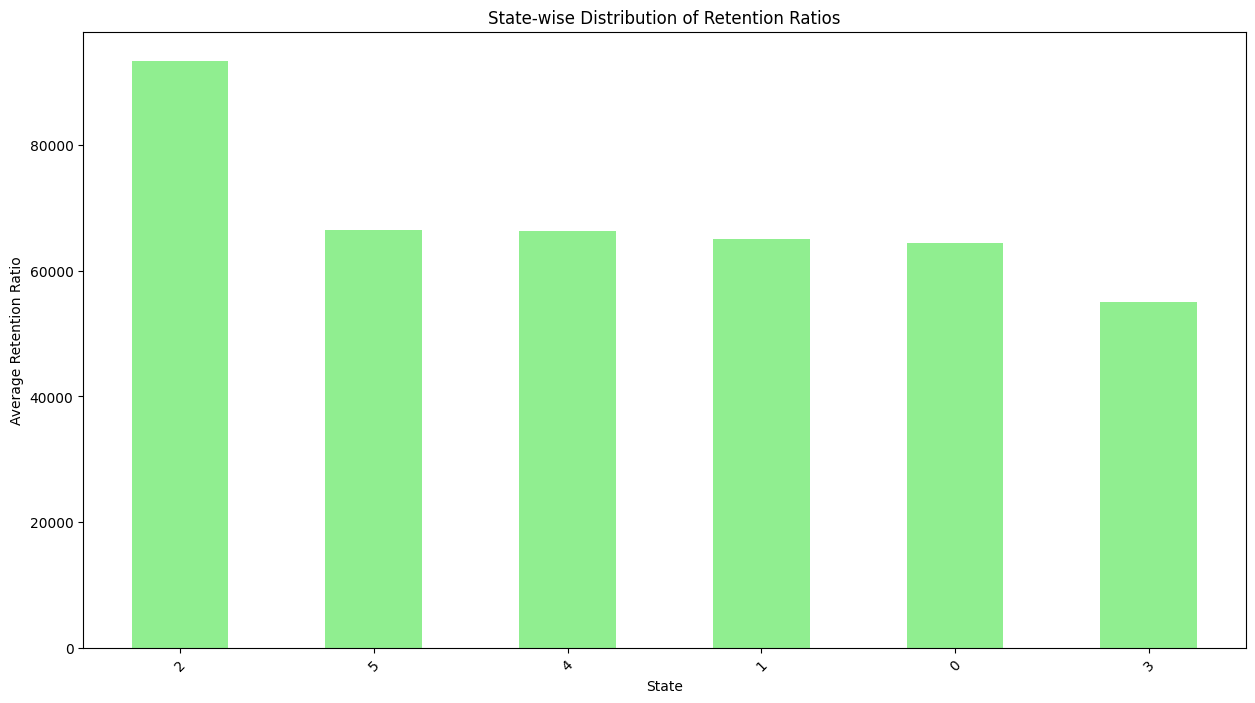

In [ ]:
plt.figure(figsize=(15, 8))
statewise_retention = data.groupby('STATE_ABBR')['RETENTION_RATIO'].mean().sort_values(ascending=False)
statewise_retention.plot(kind='bar', color='lightgreen')
plt.title('State-wise Distribution of Retention Ratios')
plt.xlabel('State')
plt.ylabel('Average Retention Ratio')
plt.xticks(rotation=45)
plt.show()


**Growth Rate over the Years**

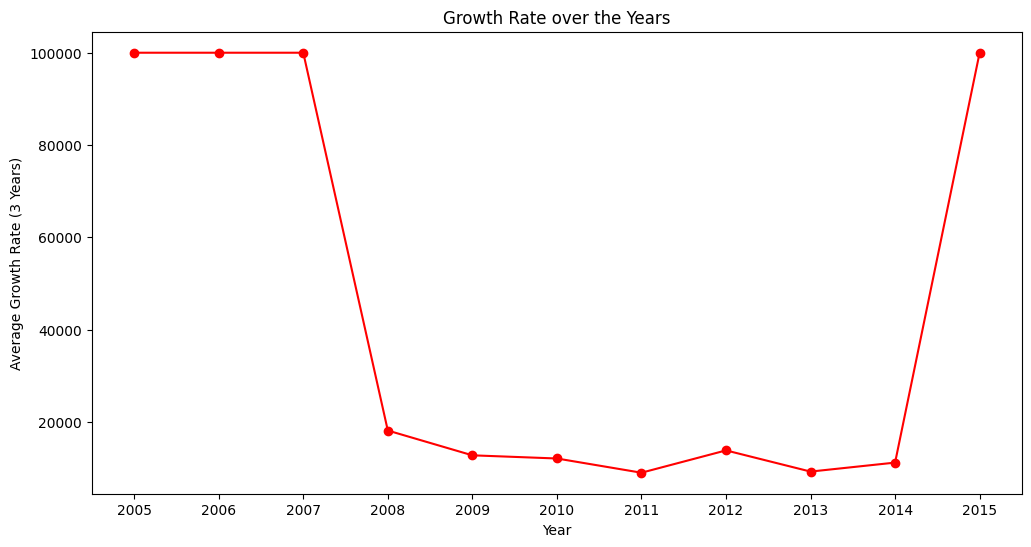

In [ ]:
plt.figure(figsize=(12, 6))
data.groupby('STAT_PROFILE_DATE_YEAR')['GROWTH_RATE_3YR'].mean().plot(kind='line', marker='o', linestyle='-', color='red')
plt.title('Growth Rate over the Years')
plt.xlabel('Year')
plt.ylabel('Average Growth Rate (3 Years)')
plt.xticks(data['STAT_PROFILE_DATE_YEAR'].unique())
plt.show()


**Loss Ratio vs. Written Premium**

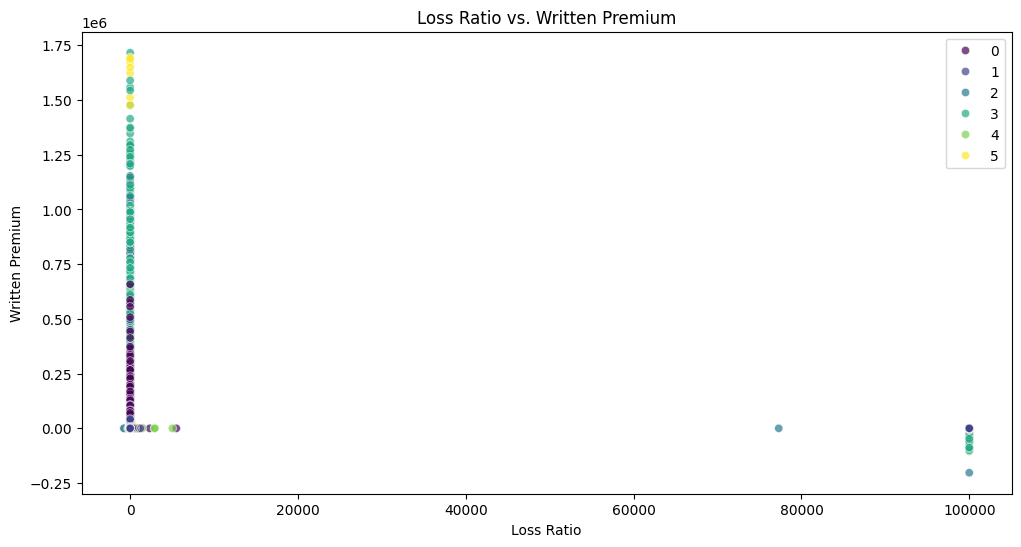

In [42]:

plt.figure(figsize=(12, 6))
sns.scatterplot(x='LOSS_RATIO', y='WRTN_PREM_AMT', data=data, alpha=0.7, hue='STATE_ABBR', palette='viridis')
plt.title('Loss Ratio vs. Written Premium')
plt.xlabel('Loss Ratio')
plt.ylabel('Written Premium')
plt.legend(loc='upper right')
plt.show()


**Average Premium by Product Line**

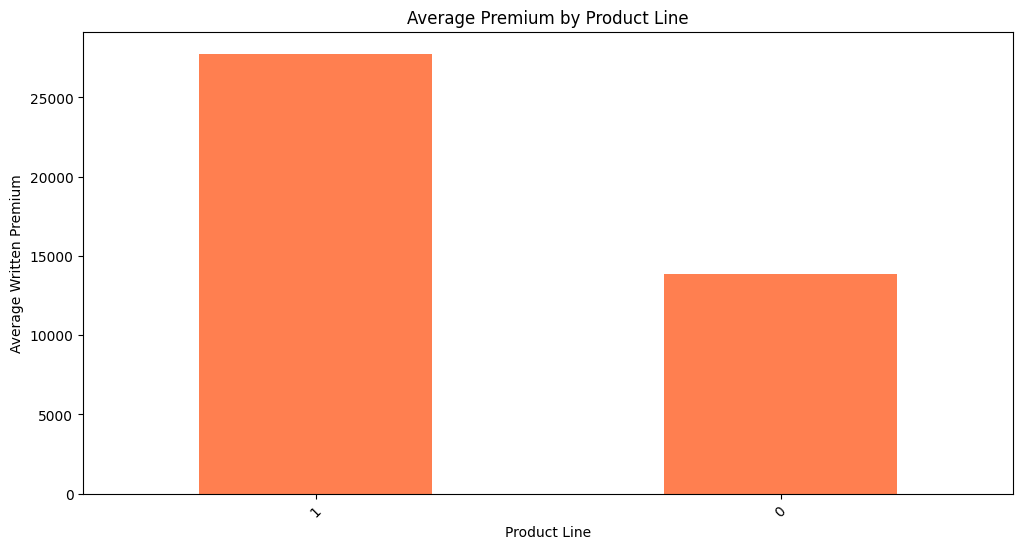

In [43]:

plt.figure(figsize=(12, 6))
product_line_premiums = data.groupby('PROD_LINE')['WRTN_PREM_AMT'].mean().sort_values(ascending=False)
product_line_premiums.plot(kind='bar', color='coral')
plt.title('Average Premium by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Average Written Premium')
plt.xticks(rotation=45)
plt.show()


**Retention Policies vs Written Premiums**

In [44]:
fig = px.scatter(data, x='RETENTION_POLY_QTY', y='NB_WRTN_PREM_AMT', color='STATE_ABBR', title='Retention Policies vs Written Premiums (Scatter Plot)')
fig.show()

# Deployment

**1. Save Your Model**

First, ensure your model is saved in a format that can be easily loaded for inference. For example, if you're using scikit-learn, you can use joblib to save the model.

In [ ]:
import joblib


joblib.dump(model, 'model.pkl')


['model.pkl']

**2. Set Up a Flask Application**


Flask is a lightweight web framework for Python. You'll create a Flask application that exposes an API endpoint to interact with your model.

Create a Flask App
Create a file named app.py for your Flask application:

In [ ]:
from flask import Flask, request, jsonify
import joblib
import numpy as np

# Load the model
model = joblib.load('model.pkl')

app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():

    data = request.get_json(force=True)


    features = np.array(data['features']).reshape(1, -1)


    prediction = model.predict(features)


    return jsonify({'prediction': prediction[0]})

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


In [ ]:
Explanation:
Import Libraries: Import Flask and necessary libraries.
Load Model: Load the pre-trained model using joblib.
Create Flask App: Initialize the Flask app.
Define Endpoint: Define a POST endpoint /predict that accepts JSON data with features, makes a prediction using the model, and returns the result.

**3. Run the Flask Application**


To start the Flask server, run the following command in your terminal:

In [ ]:
python app.py


**4. Test the Deployment**

You can test your deployed model using tools like curl, Postman, or directly from Python.

In [ ]:
curl -X POST -H "Content-Type: application/json" -d '{"features": [value1, value2, ...]}' http://127.0.0.1:5000/predict


Replace [value1, value2, ...] with the actual feature values.

**5. Deploy to a Cloud Service**

For production deployment, consider using cloud services like AWS, Google Cloud, or Azure:

AWS Elastic Beanstalk: Deploy your Flask app to AWS Elastic Beanstalk.
Google Cloud App Engine: Deploy your Flask app to Google Cloud App Engine.
Heroku: Deploy your Flask app to Heroku with a Procfile specifying the command to run the Flask app.

Example Procfile for Heroku:
Create a Procfile in your project directory with the following content

In [ ]:
web: python app.py


Conclusion
Deploying a machine learning model involves saving the model, setting up a web service, and integrating it with production systems. Flask provides a simple and effective way to deploy your model, but for production-ready deployments, consider cloud platforms that offer scalability, security, and monitoring features.